# 1- Project Overview


![alt text](http://drive.google.com/uc?export=view&id=1mSnf3JlJmCe87jZEn8CWI3kMzp6rYbPH)

- In this case study, we want to classify images of traffic signs using deep Convolutional Neural Networks (CNNs).
- The dataset consists of 43 different classes of images. 
- Classes are as listed below: 
  - 0 = Speed limit (20km/h) 
  - 1 = Speed limit (30km/h)
  - 2 = Speed limit (50km/h) 
  - 3 = Speed limit (60km/h)
  - 4 = Speed limit (70km/h) 
  - 5 = Speed limit (80km/h)
  - 6 = End of speed limit (80km/h)
  - 7 = Speed limit (100km/h)
  - 8 = Speed limit (120km/h)
  - 9 = No passing
  - 10 = No passing for vehicles over 3.5 metric tons
  - 11 = Right-of-way at the next intersection
  - 12 = Priority road
  - 13 = Yield
  - 14 = Stop
  - 15 = No vehicles
  - 16 = Vehicles over 3.5 metric tons prohibited
  - 17 = No entry
  - 18 = General caution
  - 19 = Dangerous curve to the left
  - 20 = Dangerous curve to the right
  - 21 = Double curve
  - 22 = Bumpy road
  - 23 = Slippery road
  - 24 = Road narrows on the right
  - 25 = Road work
  - 26 = Traffic signals
  - 27 = Pedestrians
  - 28 = Children crossing 
  - 29 = Bicycles crossing
  - 30 = Beware of ice/snow
  - 31 = Wild animals crossing
  - 32 = End of all speed and passing limits
  - 33 = Turn right ahead
  - 34 = Turn left ahead
  - 35 = Ahead only
  - 36 = Go straight or right
  - 37 = Go straight or left
  - 38 = Keep right
  - 39 = Keep left
  - 40 = Roundabout mandatory
  - 41 = End of no passing
  - 42 = End of no passing by vehicles over 3.5 metric tons


#2- Import Libraries and Datasets

In [1]:
import matplotlib.pyplot as plt
import numpy as np
import tensorflow as tf
import pandas as pd
import seaborn as sns
import pickle
import random

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


![alt text](http://drive.google.com/uc?export=view&id=1ymVCBWDx_O0rPZIk8T1BYYhTXTppZBNq)

In [0]:
with open("/content/train.p", mode='rb') as training_data:
    train = pickle.load(training_data)
with open("/content/valid.p", mode='rb') as validation_data:
    valid = pickle.load(validation_data)
with open("/content/test.p", mode='rb') as testing_data:
    test = pickle.load(testing_data)

In [0]:
X_train, y_train = train['features'], train['labels']
X_validation, y_validation = valid['features'], valid['labels']
X_test, y_test = test['features'], test['labels']

In [0]:
X_train.shape

(34799, 32, 32, 3)

In [0]:
y_train.shape

(34799,)

In [0]:
X_validation.shape

(4410, 32, 32, 3)

In [0]:
X_test.shape

(12630, 32, 32, 3)

#3- Images Visualization

3

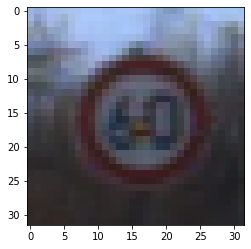

In [0]:
i = np.random.randint(1, len(X_train))
plt.imshow(X_train[i])
y_train[i]

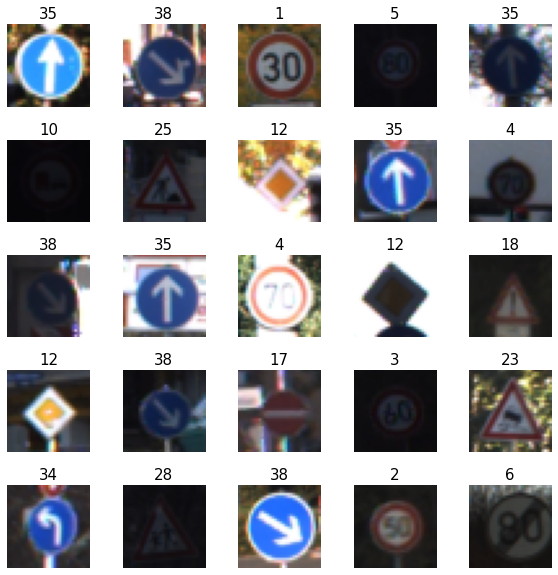

In [0]:
# Let's view more images in a grid format
# Define the dimensions of the plot grid 
W_grid = 5
L_grid = 5

# fig, axes = plt.subplots(L_grid, W_grid)
# subplot return the figure object and axes object
# we can use the axes object to plot specific figures at various locations

fig, axes = plt.subplots(L_grid, W_grid, figsize = (10,10))

axes = axes.ravel() # flaten the 5 x 5 matrix into 25 array

n_training = len(X_train) # get the length of the training dataset

# Select a random number from 0 to n_training
# create evenly spaces variables 
for i in np.arange(0, W_grid * L_grid):
    # Select a random number
    index = np.random.randint(0, n_training)
    # read and display an image with the selected index    
    axes[i].imshow(X_train[index])
    axes[i].set_title(y_train[index], fontsize = 15)
    axes[i].axis('off')
plt.subplots_adjust(hspace = 0.4)
        

#4- Convert Images to grayscale and perform normalization

In [0]:
from sklearn.utils import shuffle
X_train, y_train = shuffle(X_train, y_train)

In [0]:
X_train_gray = np.sum(X_train/3, axis = 3, keepdims = True)
X_valid_gray = np.sum(X_validation/3, axis = 3, keepdims = True)
X_test_gray = np.sum(X_test/3, axis = 3, keepdims = True)

In [0]:
X_train_gray.shape

(34799, 32, 32, 1)

In [0]:
X_train_gray_norm = (X_train_gray - 128)/128
X_valid_gray_norm = (X_valid_gray - 128)/128
X_test_gray_norm = (X_test_gray - 128)/128

In [0]:
X_valid_gray_norm.shape

(4410, 32, 32, 1)

In [0]:
X_train_gray_norm.shape

(34799, 32, 32, 1)

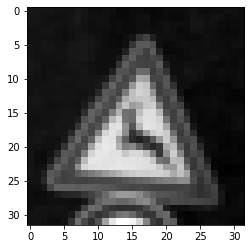

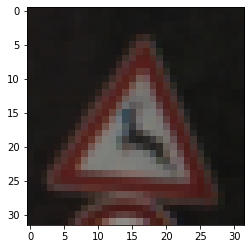

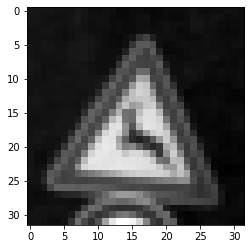

In [0]:
i = random.randint(1, len(X_train_gray))
plt.imshow(X_train_gray[i].squeeze(), cmap = 'gray')
plt.figure()
plt.imshow(X_train[i])
plt.figure()
plt.imshow(X_train_gray_norm[i].squeeze(), cmap = 'gray')

#5 The theory and intuition behind CNNs

![alt text](http://drive.google.com/uc?export=view&id=1DgYvXuua_VfbOOHX2DBmxWZHB5JdTy9m)

![alt text](http://drive.google.com/uc?export=view&id=14KWAD9BFTcjmGQk0pQc0P_JQz7IQEnGq)

#6- Build our deep CNN model

In [0]:
from keras.layers import Dense, Dropout, Flatten, Input
from keras.layers import Conv2D, MaxPooling2D
from keras.layers import BatchNormalization
from keras.optimizers import Adam
from keras.models import Sequential

hidden_num_units = 2048
hidden_num_units1 = 1024
hidden_num_units2 = 512
output_num_units = 43


pool_size = (2, 2)



CNN = Sequential([
Conv2D(32, (5, 5), activation='relu', input_shape=(32,32,1), padding='same'),
Conv2D(32, (5, 5), activation='relu', padding='same'),
 MaxPooling2D(),
 Dropout(0.3),
    

    
 Conv2D(64, (5, 5), activation='relu', padding='same'),
 MaxPooling2D(),
 Dropout(0.3),
    

    
 Conv2D(64, (5, 5), activation='relu', padding='same'),
 MaxPooling2D(),
 Dropout(0.3),
Flatten(),
Dense(units=hidden_num_units, activation='relu'),
 Dropout(0.3),
 Dense(units=hidden_num_units1, activation='relu'),
 Dropout(0.3),
 Dense(units=hidden_num_units2, activation='relu'),
 Dropout(0.3),
 Dense(units=output_num_units, input_dim=hidden_num_units, activation='softmax'),
])

CNN.summary()

Model: "sequential_46"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_265 (Conv2D)          (None, 32, 32, 32)        832       
_________________________________________________________________
conv2d_266 (Conv2D)          (None, 32, 32, 32)        25632     
_________________________________________________________________
max_pooling2d_136 (MaxPoolin (None, 16, 16, 32)        0         
_________________________________________________________________
dropout_271 (Dropout)        (None, 16, 16, 32)        0         
_________________________________________________________________
conv2d_267 (Conv2D)          (None, 16, 16, 64)        51264     
_________________________________________________________________
max_pooling2d_137 (MaxPoolin (None, 8, 8, 64)          0         
_________________________________________________________________
dropout_272 (Dropout)        (None, 8, 8, 64)        

#7- Compile and train our CNN model

In [0]:
CNN.compile(optimizer='adam', loss= 'sparse_categorical_crossentropy', metrics = ['accuracy'])

In [0]:
history = CNN.fit(x= X_train_gray_norm, 
                  y= y_train,
                  batch_size = 300, 
                  epochs = 20,
                  verbose = 1, 
                  validation_data = (X_valid_gray_norm, y_validation))

Train on 34799 samples, validate on 4410 samples
Epoch 1/20
34799/34799 [==============================] - 5s 148us/step - loss: 3.1267 - accuracy: 0.1397 - val_loss: 2.2030 - val_accuracy: 0.3381
Epoch 2/20
34799/34799 [==============================] - 5s 134us/step - loss: 1.2121 - accuracy: 0.6054 - val_loss: 0.5726 - val_accuracy: 0.8102
Epoch 3/20
34799/34799 [==============================] - 5s 135us/step - loss: 0.4304 - accuracy: 0.8574 - val_loss: 0.2689 - val_accuracy: 0.9063
Epoch 4/20
34799/34799 [==============================] - 5s 136us/step - loss: 0.2213 - accuracy: 0.9290 - val_loss: 0.1446 - val_accuracy: 0.9612
Epoch 5/20
34799/34799 [==============================] - 5s 137us/step - loss: 0.1387 - accuracy: 0.9569 - val_loss: 0.1562 - val_accuracy: 0.9481
Epoch 6/20
34799/34799 [==============================] - 5s 137us/step - loss: 0.1093 - accuracy: 0.9659 - val_loss: 0.1073 - val_accuracy: 0.9685
Epoch 7/20
34799/34799 [==============================] - 5s 13

#8- CNN model performance 

![alt text](http://drive.google.com/uc?export=view&id=1nZMfCow6pAG9WwQUdyrTzSOxNKp1gaoF)

In [0]:
score = CNN.evaluate(X_test_gray_norm, y_test)
print('Test Accuracy: {}'.format(score[1]))

12630/12630 [==============================] - 1s 97us/step
Test Accuracy: 0.9698337316513062


In [0]:
history.history.keys()

dict_keys(['val_loss', 'val_accuracy', 'loss', 'accuracy'])

In [0]:
accuracy = history.history['accuracy']
val_accuracy = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']

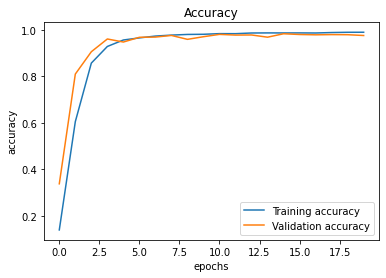

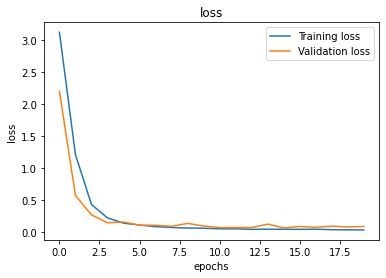

In [0]:
#plotting graphs for accuracy 
plt.figure(0)
plt.plot(history.history['accuracy'], label='Training accuracy')
plt.plot(history.history['val_accuracy'], label='Validation accuracy')
plt.title('Accuracy')
plt.xlabel('epochs')
plt.ylabel('accuracy')
plt.legend()
plt.show()
plt.figure(1)
plt.plot(history.history['loss'], label='Training loss')
plt.plot(history.history['val_loss'], label='Validation loss')
plt.title('loss')
plt.xlabel('epochs')
plt.ylabel('loss')
plt.legend()
plt.show()

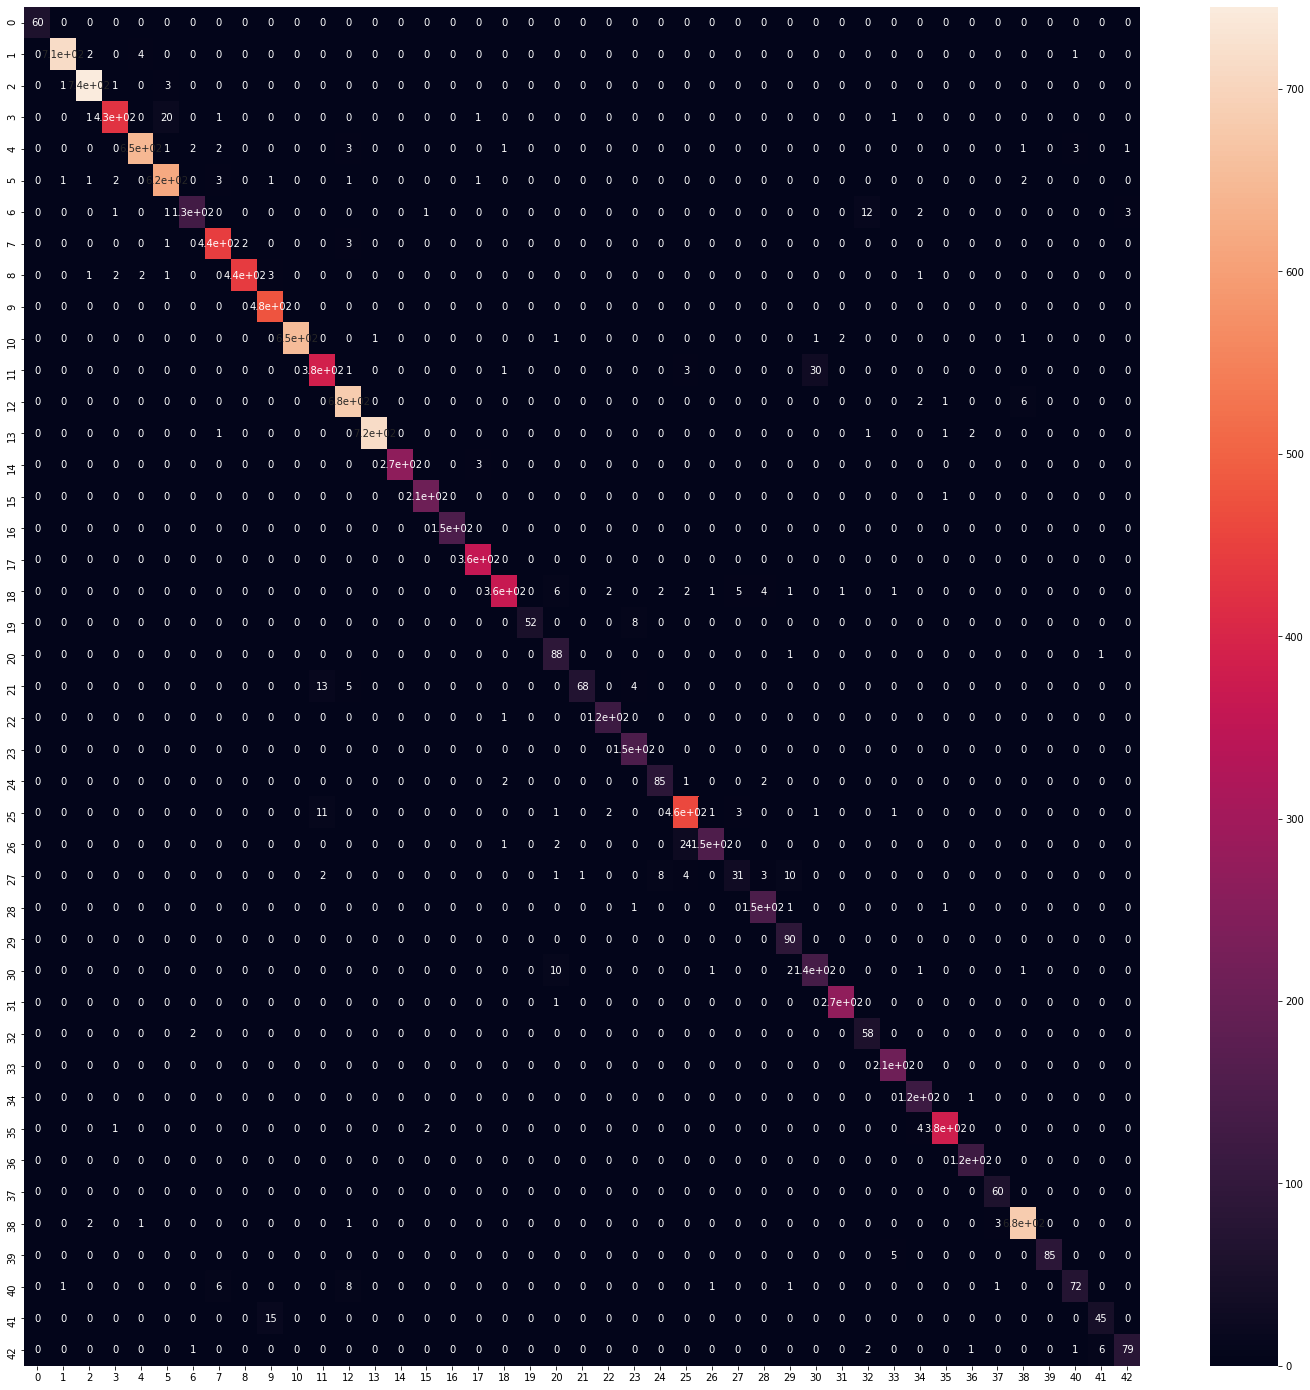

In [0]:
predicted_classes = CNN.predict_classes(X_test_gray_norm)
y_true = y_test

from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_true, predicted_classes)
plt.figure(figsize = (25, 25))
sns.heatmap(cm, annot = True)

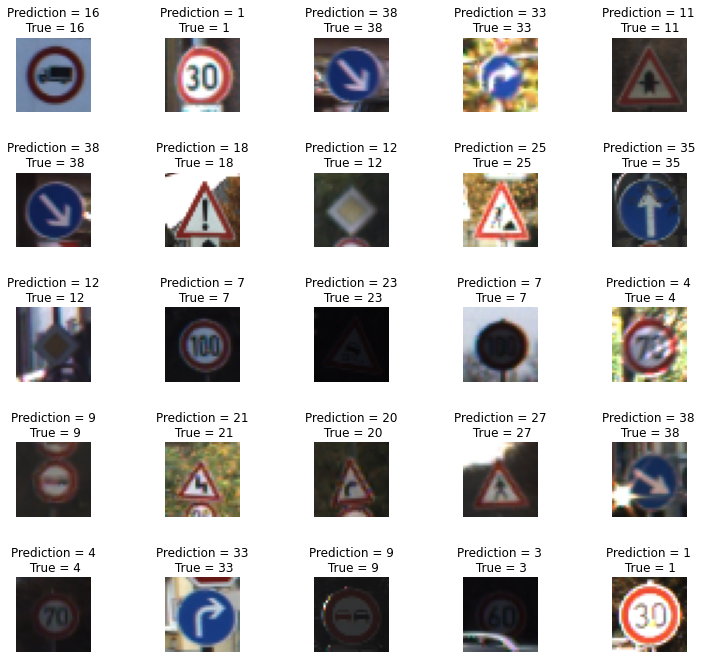

In [0]:
L = 5
W = 5

fig, axes = plt.subplots(L, W, figsize = (12, 12))
axes = axes.ravel()

for i in np.arange(0, L*W):
    axes[i].imshow(X_test[i])
    axes[i].set_title('Prediction = {}\n True = {}'.format(predicted_classes[i], y_true[i]))
    axes[i].axis('off')

plt.subplots_adjust(wspace = 1)    